# Assignment 2: K-Means Clustering on Protein Dataset

Import the usual modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read the file into a Pandas DataFrame.

In [26]:
protein=pd.read_csv('protein_environ.csv')
protein.head()

,ELEMENT,R,SUR_CONT_5.0,SUR_CONT_10.0,SUR_CONT_15.0,SUR_CONT_20.0,SUR_CONT_25.0,SUR_CONT_30.0,VOL_CONT_5.0,VOL_CONT_10.0,VOL_CONT_15.0,VOL_CONT_20.0,VOL_CONT_25.0,VOL_CONT_30.0,X,Y,Z
0,N,1.8300,121.522571,548.881028,1264.830463,2289.518419,3391.337424,3653.967363,223.210796,1143.797421,3207.296557,5795.562616,7437.812100,7679.494767,0.074,3.305,12.661
1,C,1.9255,134.702052,636.530842,1387.827686,2514.313781,3500.515835,3671.055810,290.567109,1327.942094,3665.775446,6226.401736,7525.075946,7690.406892,0.320,3.899,11.317
2,C,1.9255,114.170039,810.368483,1933.682919,3205.454201,3625.612448,3677.940933,454.008471,2309.263868,5206.656879,7176.821360,7647.408006,7692.459359,0.793,1.870,8.105
3,C,1.9255,145.443717,534.715664,1293.692551,2189.031480,2983.734659,3550.846935,258.304961,1307.891841,3086.614355,5262.122889,6800.541229,7582.953084,10.492,8.361,3.293
4,O,1.7500,142.193057,537.457788,1295.587449,2192.705808,3036.771003,3571.304334,243.117558,1284.578485,3080.921720,5310.062713,6891.578978,7604.861335,9.417,9.223,3.637


Basic information of the dataset

In [27]:
protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ELEMENT        753 non-null    object 
 1   R              753 non-null    float64
 2   SUR_CONT_5.0   753 non-null    float64
 3   SUR_CONT_10.0  753 non-null    float64
 4   SUR_CONT_15.0  753 non-null    float64
 5   SUR_CONT_20.0  753 non-null    float64
 6   SUR_CONT_25.0  753 non-null    float64
 7   SUR_CONT_30.0  753 non-null    float64
 8   VOL_CONT_5.0   753 non-null    float64
 9   VOL_CONT_10.0  753 non-null    float64
 10  VOL_CONT_15.0  753 non-null    float64
 11  VOL_CONT_20.0  753 non-null    float64
 12  VOL_CONT_25.0  753 non-null    float64
 13  VOL_CONT_30.0  753 non-null    float64
 14  X              753 non-null    float64
 15  Y              753 non-null    float64
 16  Z              753 non-null    float64
dtypes: float64(16), object(1)
memory usage: 100.1+ KB


We only want to perform clustering based on the SUR_* and VOL_* features (thus not on "ELEMENT", "R", "X", "Y", or "Z"). Assignment 2A: from the DataFrame select the SUR_* and VOL* features and convert them into a numpy array to be used by the clustering algorithm.

Assignment 2A: use the StandardScaler class of sklearn.preprocessing to standardize the selected features

In [102]:
from sklearn.preprocessing import StandardScaler

Assignment 2B: Using the KMeans class from sklearn.cluster perform k-means clustering with a number of clusters that vary from 2 to 10. 

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Assignment 2B: Plot the inertia of the clusters as a function of the number of clusters. Pick a reasonable model. NOTE: the dataset was not designed for cluster, so it may be that the results cannot allow you to select an optimal method.

Assignment 2C: Once you have a reasonable model, assign to each atom of the protein a cluster label (e.g. add a new column to the DataFrame with the cluster index). Select the atoms of the protein that have a "Z" coordinate close to zero (plus or minus 1 Angstrom) and visualize them in the X-Y plane using different colors for different clusters.

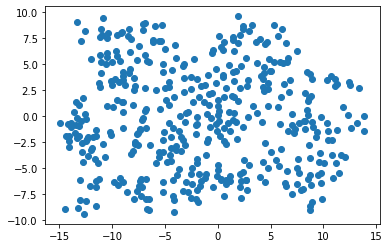

In [103]:
# The following commands show you how to visualize the atoms on a XY plane, selecting only those with Z close to zero
mask=abs(protein["Z"]<1).values # you can now select the rows of the DataFrame with Z close to zero by specifying DataFrame.loc[mask]
x=protein[["X"]].loc[mask].values
y=protein[["Y"]].loc[mask].values
plt.scatter(x,y)
# You may want to find a way to do scatter plots for each cluster group